<a href="https://colab.research.google.com/github/valsson-group/UNT-ChemicalApplicationsOfMachineLearning-Spring2026/blob/main/Lecture-8_February-12-2026/Lecture-8_UnderfittingVersusOverfitting_and_CrossValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Underfitting versus overfitting


In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Generate Datasets


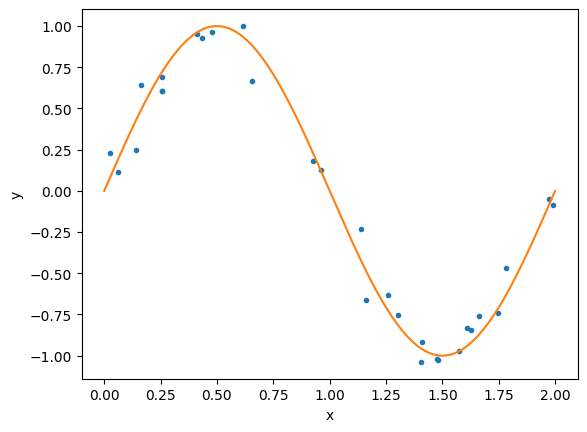

In [108]:
# Define a random number generator.
# This is the recommended way to use randon number in numpy.

rng = np.random.default_rng()

x_range_min = 0.0
x_range_max = 2.0

random_sigma=0.1
NumberOfValues=30

# sample x values randomly uniformaly from the range given by [x_range_min,x_range_max]
# this will give a numpy array of NumberOfValues
x = rng.uniform(low=x_range_min, high=x_range_max, size=NumberOfValues)

# generate a numpy array of random values from a normal distrubution
# with mean of 0 and standard deviation given by random_sigma
noise = rng.normal(loc=0.0, scale=1, size=x.size)

def true_func(x):
  return np.sin(np.pi*x)

# calculate the y values from the x values and the noise ter,
y = true_func(x) + noise*random_sigma


x_grid = np.linspace(x_range_min,x_range_max,1000)


plt.plot(x,y,'.',label='Data')
plt.plot(x_grid,true_func(x_grid),label='True Function')
plt.xlabel("x")
plt.ylabel("y")
plt.show()


# Note that due to the random noise random noise component
# you will get a different results each time.

# If you want to obtain reproducable results that are identical
# each time, you can initialize the random number generator
# with a given random seed (that should be a postive integer)
# by using rng = np.random.default_rng(seed=__SEED__), where
# __SEED__ is some number that you choose.

# If no random seed is given, then the random seed is selected
# randomly.


## Linear Fit

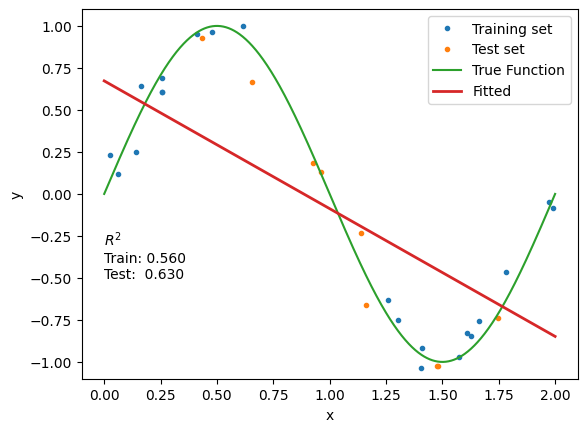

In [109]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

model = LinearRegression()

model.fit(x_train.reshape(-1, 1),y_train.reshape(-1, 1))

r2_train = model.score(x_train.reshape(-1,1),y_train.reshape(-1,1))
r2_test  = model.score(x_test.reshape(-1,1),y_test.reshape(-1,1))

# Here we create a plot showing the fit as a line

# we first create a dense grind in range [x_range_min,x_range_max]
x_grid = np.linspace(x_range_min,x_range_max,1000)

# then calculate the y values predicted by the linear regression
# model using the .predict function.
y_predict_grid = model.predict(x_grid.reshape(-1,1))

# plot dataset as points
plt.plot(x_train,y_train,'.',label="Training set")
plt.plot(x_test,y_test,'.',label="Test set")

# plot true function as a line
plt.plot(x_grid,true_func(x_grid),label='True Function')

# plot  fit as a line
plt.plot(x_grid,y_predict_grid,'-',label="Fitted",linewidth=2.0)

# add a text to plot to show the R^2 values
# note that the x,y coordiantes are given in the coordinate
# system of the data.
# In the text string we use the "\n" character that is
# special character to indicate a new line.
plt.text(x=0.0, y=-0.5,
         s="$R^2$\nTrain: {:.3f}\nTest:  {:.3f}".format(r2_train,r2_test),
         fontsize=10)

plt.xlabel("x")
plt.ylabel("y")

plt.ylim([-1.1,+1.1])

plt.legend()
plt.show()



## Polynomial Fit



### 4th degree polynomial

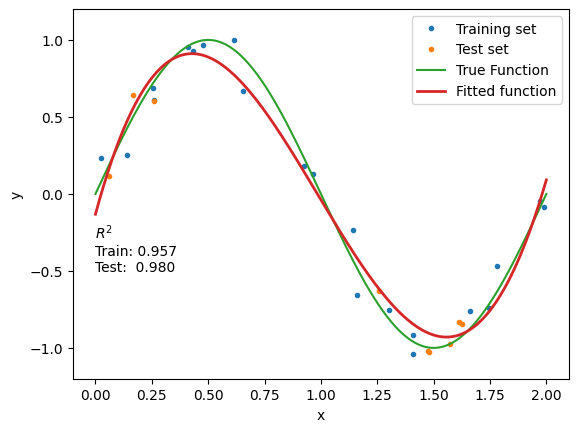

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

Polynomial_Degree = 4

model = Pipeline([
    ('poly', PolynomialFeatures(degree=Polynomial_Degree, include_bias=False)), # Generate degree 3 features
    ('linear', LinearRegression()) # Fit a linear model on the new features
])

model.fit(x_train.reshape(-1, 1),y_train.reshape(-1, 1))

r2_train = model.score(x_train.reshape(-1,1),y_train.reshape(-1,1))
r2_test  = model.score(x_test.reshape(-1,1),y_test.reshape(-1,1))

# Here we create a plot showing the fit as a line

# we first create a dense grind in range [x_range_min,x_range_max]
x_grid = np.linspace(x_range_min,x_range_max,1000)

# then calculate the y values predicted by the linear regression
# model using the .predict function.
y_predict_grid = model.predict(x_grid.reshape(-1,1))

# plot dataset as points
plt.plot(x_train,y_train,'.',label="Training set")
plt.plot(x_test,y_test,'.',label="Test set")

# plot true function as a line
plt.plot(x_grid,true_func(x_grid),label='True Function')

# plot  fit as a line
plt.plot(x_grid,y_predict_grid,'-',label="Fitted function",linewidth=2.0)

# add a text to plot to show the R^2 values
# note that the x,y coordiantes are given in the coordinate
# system of the data.
# In the text string we use the "\n" character that is
# special character to indicate a new line.
plt.text(x=0.0, y=-0.5,
         s="$R^2$\nTrain: {:.3f}\nTest:  {:.3f}".format(r2_train,r2_test),
         fontsize=10)

plt.xlabel("x")
plt.ylabel("y")

plt.ylim([-1.2,+1.2])

plt.legend()
plt.show()

### 16th degree polynomial

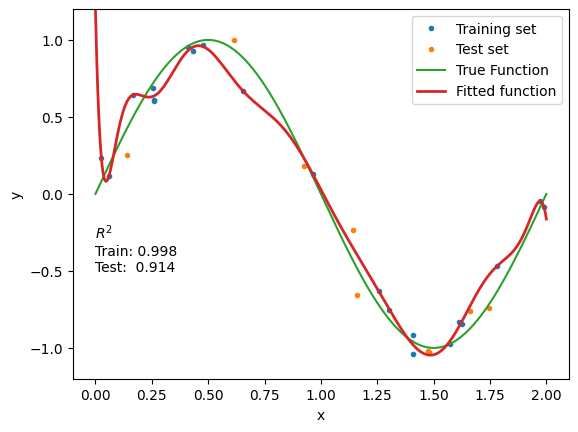

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

Polynomial_Degree = 16

model = Pipeline([
    ('poly', PolynomialFeatures(degree=Polynomial_Degree, include_bias=False)), # Generate degree 3 features
    ('linear', LinearRegression()) # Fit a linear model on the new features
])

model.fit(x_train.reshape(-1, 1),y_train.reshape(-1, 1))

r2_train = model.score(x_train.reshape(-1,1),y_train.reshape(-1,1))
r2_test  = model.score(x_test.reshape(-1,1),y_test.reshape(-1,1))

# Here we create a plot showing the fit as a line

# we first create a dense grind in range [x_range_min,x_range_max]
x_grid = np.linspace(x_range_min,x_range_max,1000)

# then calculate the y values predicted by the linear regression
# model using the .predict function.
y_predict_grid = model.predict(x_grid.reshape(-1,1))

# plot dataset as points
plt.plot(x_train,y_train,'.',label="Training set")
plt.plot(x_test,y_test,'.',label="Test set")

# plot true function as a line
plt.plot(x_grid,true_func(x_grid),label='True Function')

# plot  fit as a line
plt.plot(x_grid,y_predict_grid,'-',label="Fitted function",linewidth=2.0)

# add a text to plot to show the R^2 values
# note that the x,y coordiantes are given in the coordinate
# system of the data.
# In the text string we use the "\n" character that is
# special character to indicate a new line.
plt.text(x=0.0, y=-0.5,
         s="$R^2$\nTrain: {:.3f}\nTest:  {:.3f}".format(r2_train,r2_test),
         fontsize=10)

plt.xlabel("x")
plt.ylabel("y")

plt.ylim([-1.2,+1.2])

plt.legend()
plt.show()

### Include K-fold Cross validation

CV scores
- 5-Fold CV                   : -3.5442e+01 +- 4.4327e+01
- Random Splits (1000 splits) : -2.5585e+08 +- 7.9881e+09


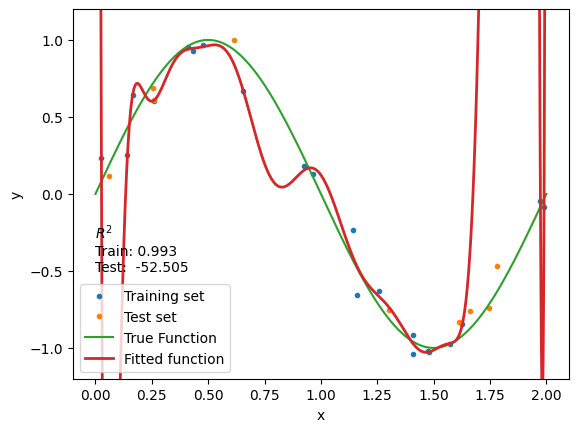

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

Polynomial_Degree = 16

model = Pipeline([
    ('poly', PolynomialFeatures(degree=Polynomial_Degree, include_bias=False)), # Generate degree 3 features
    ('linear', LinearRegression()) # Fit a linear model on the new features
])

model.fit(x_train.reshape(-1, 1),y_train.reshape(-1, 1))

r2_train = model.score(x_train.reshape(-1,1),y_train.reshape(-1,1))
r2_test  = model.score(x_test.reshape(-1,1),y_test.reshape(-1,1))

# Evaluate the models using crossvalidation
# employ 5-fold CV
scores_fold = cross_val_score(
        model, x.reshape(-1, 1), y.reshape(-1, 1), cv=5
)

# Evaluate the models using crossvalidation
NumSplits=1000
cv = ShuffleSplit(n_splits=NumSplits, test_size=0.3)
scores_random = cross_val_score(
        model, x.reshape(-1, 1), y.reshape(-1, 1), cv=cv
)

print("CV scores")
print("- 5-Fold CV                   : {:.4e} +- {:.4e}".format(scores_fold.mean(),scores_fold.std()))
print("- Random Splits ({:d} splits) : {:.4e} +- {:.4e}".format(NumSplits, scores_random.mean(), scores_random.std()))

# Here we create a plot showing the fit as a line

# we first create a dense grind in range [x_range_min,x_range_max]
x_grid = np.linspace(x_range_min,x_range_max,1000)

# then calculate the y values predicted by the linear regression
# model using the .predict function.
y_predict_grid = model.predict(x_grid.reshape(-1,1))

# plot dataset as points
plt.plot(x_train,y_train,'.',label="Training set")
plt.plot(x_test,y_test,'.',label="Test set")

# plot true function as a line
plt.plot(x_grid,true_func(x_grid),label='True Function')

# plot  fit as a line
plt.plot(x_grid,y_predict_grid,'-',label="Fitted function",linewidth=2.0)

# add a text to plot to show the R^2 values
# note that the x,y coordiantes are given in the coordinate
# system of the data.
# In the text string we use the "\n" character that is
# special character to indicate a new line.
plt.text(x=0.0, y=-0.5,
         s="$R^2$\nTrain: {:.3f}\nTest:  {:.3f}".format(r2_train,r2_test),
         fontsize=10)

plt.xlabel("x")
plt.ylabel("y")

plt.ylim([-1.2,+1.2])

plt.legend()
plt.show()

### Do a search over polynomial order

In [113]:
def do_cross_validation_fold(Polynomial_Degree):
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import LinearRegression
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.pipeline import Pipeline
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import ShuffleSplit

  model = Pipeline([
      ('poly', PolynomialFeatures(degree=Polynomial_Degree, include_bias=False)), # Generate degree 3 features
      ('linear', LinearRegression()) # Fit a linear model on the new features
  ])

  # Evaluate the models using crossvalidation
  # employ 5-fold CV
  scores = cross_val_score(
          model, x.reshape(-1, 1), y.reshape(-1, 1), cv=5
  )

  return scores.mean(), scores.std()


def do_cross_validation_random(Polynomial_Degree,NumSplits=1000):
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import LinearRegression
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.pipeline import Pipeline
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import ShuffleSplit

  model = Pipeline([
      ('poly', PolynomialFeatures(degree=Polynomial_Degree, include_bias=False)), # Generate degree 3 features
      ('linear', LinearRegression()) # Fit a linear model on the new features
  ])

  # Evaluate the models using crossvalidation
  cv = ShuffleSplit(n_splits=NumSplits, test_size=0.3)
  scores = cross_val_score(
          model, x.reshape(-1, 1), y.reshape(-1, 1), cv=cv
  )

  return scores.mean(), scores.std()


In [114]:
degree=[]
scores_fold_mean=[]
scores_fold_stddev=[]

scores_random_mean=[]
scores_random_stddev=[]

for n in range(1,16):
  degree.append(n)
  mean, stddev = do_cross_validation_fold(n)
  scores_fold_mean.append(mean)
  scores_fold_stddev.append(stddev)

  mean, stddev = do_cross_validation_random(n,NumSplits=100)
  scores_random_mean.append(mean)
  scores_random_stddev.append(stddev)



In [115]:
print("5-fold CV:")
for n, mean, std in zip(degree,scores_fold_mean,scores_fold_stddev):
  print(" {:2d}   {:.4f}+-{:.4f}".format(n,mean,std))

print("Optimal degree: {:d}".format(degree[np.argmax(scores_fold_mean)]))



5-fold CV:
  1   0.3751+-0.3600
  2   0.3300+-0.3225
  3   0.9090+-0.1096
  4   0.9063+-0.1104
  5   0.9553+-0.0375
  6   0.9484+-0.0474
  7   0.9533+-0.0357
  8   0.9538+-0.0324
  9   0.9284+-0.0800
 10   0.8617+-0.1515
 11   0.8481+-0.0863
 12   0.7951+-0.1835
 13   -1.6940+-3.0831
 14   -11.4691+-10.8543
 15   -20.0636+-18.0189
Optimal degree: 5


In [116]:
print("Random CV:")
for n, mean, std in zip(degree,scores_random_mean,scores_random_stddev):
  print(" {:2d}   {:.4f}+-{:.4f}".format(n,mean,std))

print("Optimal degree: {:d}".format(degree[np.argmax(scores_random_mean)]))

Random CV:
  1   0.4235+-0.2536
  2   0.2891+-0.6051
  3   0.9198+-0.0855
  4   0.8177+-0.4058
  5   0.9525+-0.0532
  6   0.7736+-1.6533
  7   0.8361+-0.4578
  8   -4.8014+-51.1141
  9   -3.3836+-16.8893
 10   -33.3971+-176.0261
 11   -3401.6638+-30867.6785
 12   -2011.4593+-10182.6014
 13   -32403.1307+-255893.8314
 14   -2244873.3729+-19622917.4050
 15   -748685.3035+-3169756.2849
Optimal degree: 5


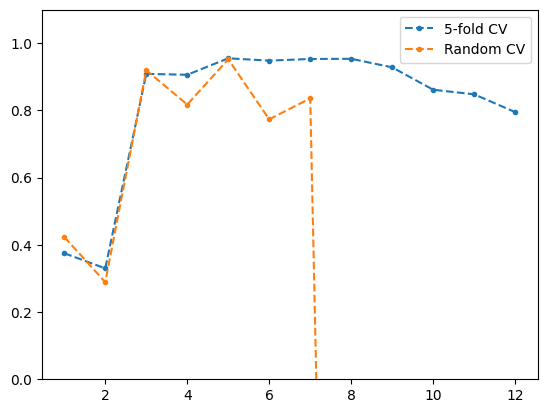

Optimal degree
5-fold: 5
Random: 5


In [118]:
max_degree_index=12

plt.plot(degree[:max_degree_index],scores_fold_mean[:max_degree_index],   '.--',      label="5-fold CV")
plt.plot(degree[:max_degree_index],scores_random_mean[:max_degree_index], '.--',    label="Random CV")


plt.ylim([0,1.1])
plt.legend()
plt.show()

print("Optimal degree")
print("5-fold: {:d}".format(degree[np.argmax(scores_fold_mean)]))
print("Random: {:d}".format(degree[np.argmax(scores_random_mean)]))
